In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df = pd.read_csv('KM-12-2.csv')
df.head()

,GT,Model_1_0,Model_1_1,Model_2_0,Model_2_1
0,1,0.133871,0.866129,0.265398,0.734602
1,1,0.707424,0.292576,0.894910,0.105090
2,1,0.355263,0.644737,0.957991,0.042009
3,1,0.674354,0.325646,0.060504,0.939496
4,1,0.674354,0.325646,0.991170,0.008830


In [16]:
df = df.sort_values(by="GT")

In [17]:
print(len(df[df["GT"] == 0]))
print(len(df[df["GT"] == 1]))

2500
2500


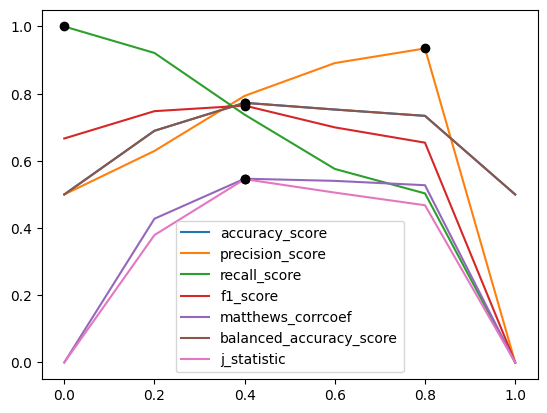

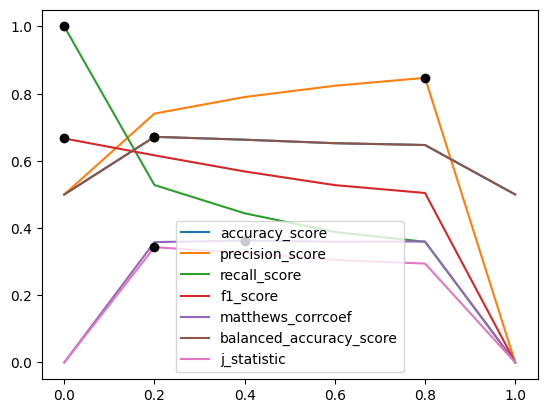

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, \
    balanced_accuracy_score, confusion_matrix

def j_statistic(x, y):
    tn, fp, fn, tp = confusion_matrix(x, y).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity + specificity - 1

metrics = (accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, 
    balanced_accuracy_score, j_statistic)

T = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

for metric in metrics:
    X = [metric(df["GT"], df["Model_1_1"].map(lambda x: int(x > t))) for t in T]
    i = X.index(max(X))
    plt.plot(T, X, label=metric.__name__)
    plt.plot(T[i], X[i], "o", color="black")

plt.legend()
plt.show()

for metric in metrics:
    X = [metric(df["GT"], df["Model_2_1"].map(lambda x: int(x > t))) for t in T]
    i = X.index(max(X))
    plt.plot(T, X, label=metric.__name__)
    plt.plot(T[i], X[i], "o", color="black")

plt.legend()
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve
from scipy import integrate

fpr, tpr, thresholds = precision_recall_curve(df["GT"], df["Model_1_1"], pos_label=1)
print(integrate.trapz(x=fpr, y=tpr))

print(roc_auc_score(df["GT"], df["Model_1_1"]))

fpr, tpr, thresholds = precision_recall_curve(df["GT"], df["Model_2_1"], pos_label=1)
print(integrate.trapz(x=fpr, y=tpr))

print(roc_auc_score(df["GT"], df["Model_2_1"]))

0.36792303868890086
0.8454808
0.2853282349982374
0.76292856


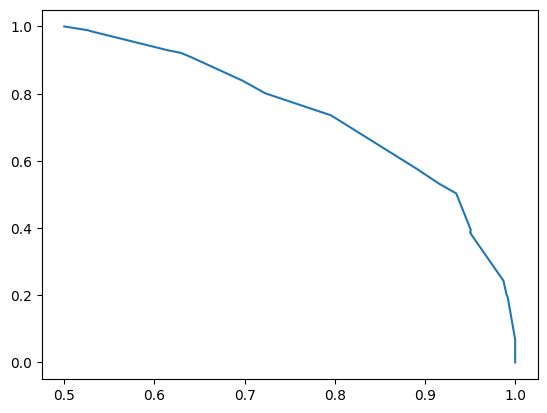

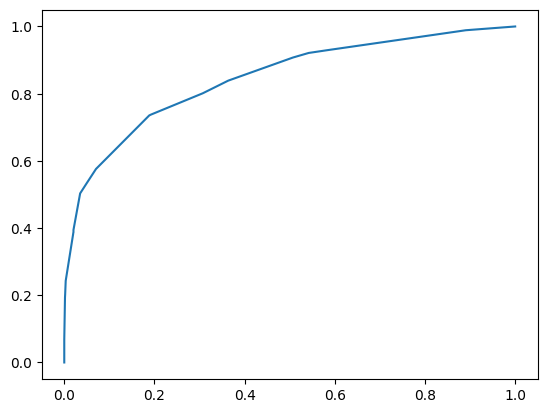

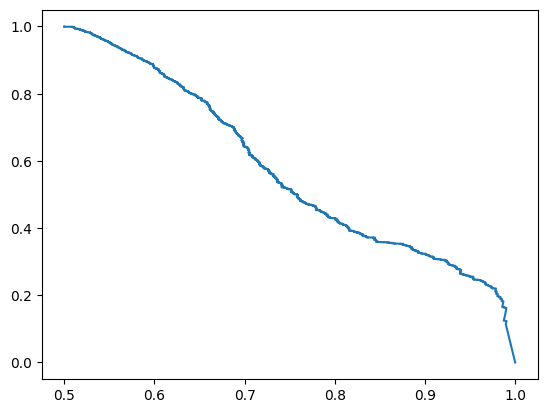

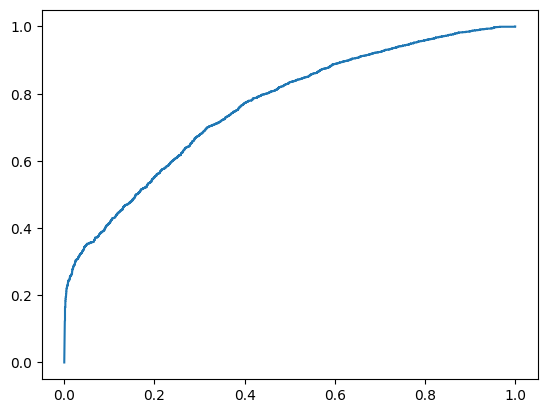

In [20]:
fpr, tpr, thresholds = precision_recall_curve(df["GT"], df["Model_1_1"], pos_label=1)
plt.plot(fpr, tpr)
plt.show()

fpr, tpr, thresholds = roc_curve(df["GT"], df["Model_1_1"], pos_label=1)
plt.plot(fpr, tpr)
plt.show()

fpr, tpr, thresholds = precision_recall_curve(df["GT"], df["Model_2_1"], pos_label=1)
plt.plot(fpr, tpr)
plt.show()

fpr, tpr, thresholds = roc_curve(df["GT"], df["Model_2_1"], pos_label=1)
plt.plot(fpr, tpr)
plt.show()

In [21]:
birth_date = "26.04"
day = int(birth_date.split(".")[0])
part = (50 + 5 * (day % 9)) / 100
new_df = df.iloc[:int((0.5 + (1 - part) / 2) * len(df))]

In [22]:
print(len(new_df[new_df["GT"] == 1]) / len(df[df["GT"] == 1]))
print(len(new_df[new_df["GT"] == 0]))
print(len(new_df[new_df["GT"] == 1]))

0.1
2500
250


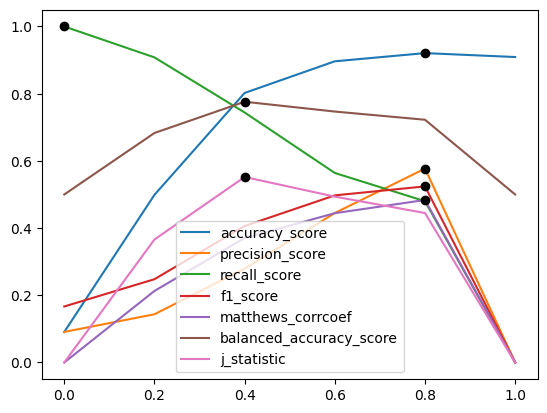

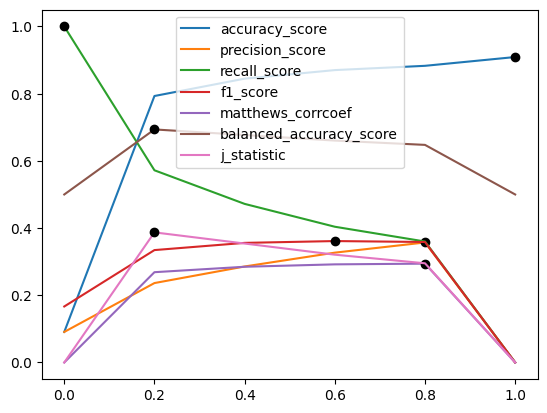

In [23]:
for metric in metrics:
    X = [metric(new_df["GT"], new_df["Model_1_1"].map(lambda x: int(x > t))) for t in T]
    i = X.index(max(X))
    plt.plot(T, X, label=metric.__name__)
    plt.plot(T[i], X[i], "o", color="black")

plt.legend()
plt.show()

for metric in metrics:
    X = [metric(new_df["GT"], new_df["Model_2_1"].map(lambda x: int(x > t))) for t in T]
    i = X.index(max(X))
    plt.plot(T, X, label=metric.__name__)
    plt.plot(T[i], X[i], "o", color="black")

plt.legend()
plt.show()

In [24]:
fpr, tpr, thresholds = precision_recall_curve(new_df["GT"], new_df["Model_1_1"], pos_label=1)
print(integrate.trapz(x=fpr, y=tpr))

print(roc_auc_score(new_df["GT"], new_df["Model_1_1"]))

fpr, tpr, thresholds = precision_recall_curve(new_df["GT"], new_df["Model_2_1"], pos_label=1)
print(integrate.trapz(x=fpr, y=tpr))

print(roc_auc_score(new_df["GT"], new_df["Model_2_1"]))

0.45753182693011824
0.8430375999999999
0.3181159526450199
0.7831376


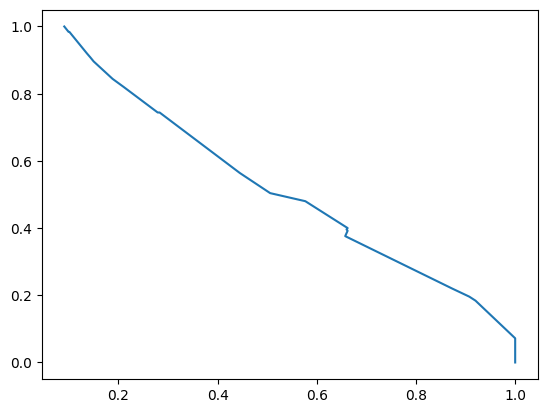

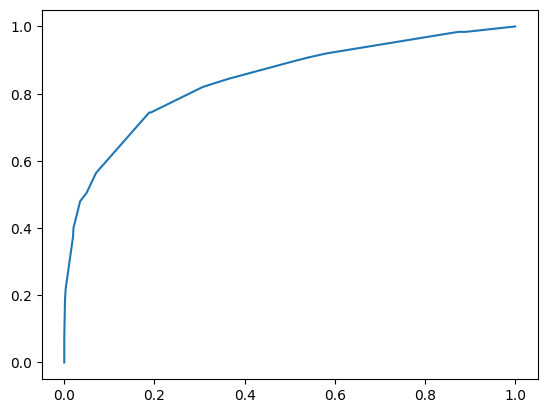

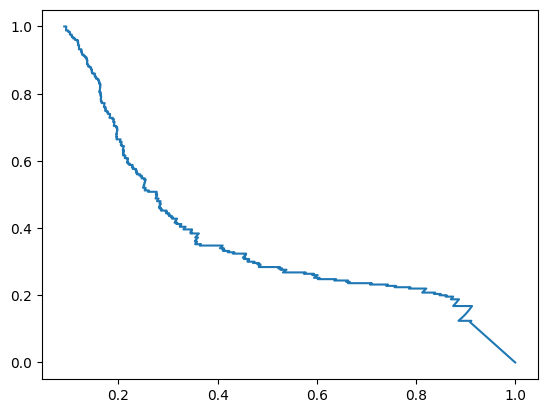

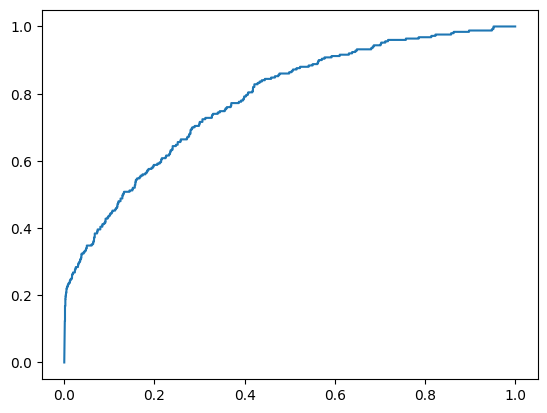

In [25]:
fpr, tpr, thresholds = precision_recall_curve(new_df["GT"], new_df["Model_1_1"], pos_label=1)
plt.plot(fpr, tpr)
plt.show()

fpr, tpr, thresholds = roc_curve(new_df["GT"], new_df["Model_1_1"], pos_label=1)
plt.plot(fpr, tpr)
plt.show()

fpr, tpr, thresholds = precision_recall_curve(new_df["GT"], new_df["Model_2_1"], pos_label=1)
plt.plot(fpr, tpr)
plt.show()

fpr, tpr, thresholds = roc_curve(new_df["GT"], new_df["Model_2_1"], pos_label=1)
plt.plot(fpr, tpr)
plt.show()